# Исследование объявлений о продаже квартир

Есть данные сервиса Яндекс.Недвижимость — объявления о продаже квартир в Санкт-Петербурге и других пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Нужно установить параметры.

По каждой квартире на продажу доступны два вида данных. Первые заполнены пользователем, вторые созданы автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма и т.д.

## Изучение данных из файла

In [1]:
#импортируем библиотеку пандас и matplotlib.pyplot 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# открываем таблицу, указывая разделителем столбцов '\t'
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# посмотрим основную информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
# посмотрим основные статистические характеристики данных по каждому числовому признаку 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Рассмотрим полученную информацию подробнее.
Всего в таблице 22 столбца, с разными типами данных
Подробно разберём, какие в data столбцы и какую информацию они содержат:

 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах(м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении
 
Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

## Предобработка данных

### Обработка пропусков

In [5]:
#Выявим суммарное количество пропусков в таблице data, выявленных методом isnull()
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим пропущенные значения, они есть в столбцах:

 - 'ceiling_height' (высота полотков(м)) - около 40% пропусков
 - 'floors_total' (всего этажей в доме) - совсем немного пропусков (меньше 100)
 - 'living_area' (жилая площадь в квадратных метрах) - около 10% пропусков
 - 'is_apartment' (аппортаменты (булев тип)) - около 90% пропусков
 - 'kitchen_area' (площадь кухни в квадратных метрах(м²)) - около 10% пропусков
 - 'balcony' (число балконов) - около 50% пропусков
 - 'locality_name' (название населённого пункта) - меньше 50 шт пропусков
 - 'airports_nearest' (расстояние до ближайшего аэропорта в метрах (м)) - около 45% пропусков
 - 'cityCenters_nearest' (расстояние до центра города (м)) - около 45% пропусков
 - 'parks_around3000' (число парков в радиусе 3 км) - около 45% пропусков
 - 'parks_nearest' (расстояние до ближайшего парка (м)) - около 65% пропусков
 - 'ponds_around3000' (число водоёмов в радиусе 3 км) - около 45% пропусков
 - 'ponds_nearest' (расстояние до ближайшего водоёма (м)) - около 60% пропусков
 - 'days_exposition' (сколько дней было размещено объявление (от публикации до снятия)) - около 20% пропусков
 
 Будем сводить к отсутствию пропусков, там где это возможно.

Высота потолков могла быть не заполнена по незнанию.
Т.к. максимальное значение в данном столбце равно 100, что невозможно, мы не будем заменять на среднее и заменим по медиане.

Количество этажей могли быть не заполнены по невнимательности, или например дома одноэтажные, и потому не было заполнено.
Заменим на медианное значение.

In [6]:
# Заполняем пропуски в столбце с помощью метода fillna() 
data['ceiling_height' ] = data['ceiling_height' ].fillna(data['ceiling_height'].median())

#Заменим в столбце floors_total по медиане в разрезе с этажом, на каком продаётся квартира.
data['floors_total'] = data['floors_total'].fillna(data.groupby(['floor'])['floors_total'].transform('median'))

По какой причине не было заполнена графа с жилой и кухонной площадями мне неизвестна, возможно техническая ошибка...

Заменим пропущенные значения на умножение общей площади на коэффициент между жилой и кухонной на общую площадт в зависимости от количества комнат в квартире

In [7]:
# Создадим вспомогательную таблицу где указаны сколько комнат в квартире их медианные значения для
# жилой площади, кухонной площади и общей площади
# И создадим новые столбцы с соотношением кухонной и жилой площади к общей площади
coeff = data.groupby('rooms').agg({'living_area': 'median', 'kitchen_area': 'median', 'total_area': 'median'})
coeff['kitchen_coeff'] = (coeff['kitchen_area']/coeff['total_area']).round(2)
coeff['living_coeff'] = (coeff['living_area']/coeff['total_area']).round(2)
coeff

,living_area,kitchen_area,total_area,kitchen_coeff,living_coeff
rooms,,,,,
0,18.000,NaN,26.05,NaN,0.69
1,17.600,9.04,36.56,0.25,0.48
2,30.500,8.80,53.00,0.17,0.58
3,45.000,9.50,73.00,0.13,0.62
4,63.600,11.10,99.30,0.11,0.64
5,91.785,15.10,146.45,0.10,0.63
6,123.900,19.50,184.30,0.11,0.67
7,145.000,20.00,214.00,0.09,0.68
8,161.000,25.00,235.70,0.11,0.68


In [8]:
# И теперь заменяем в основной таблице столбцы с жилой и кухонной площади с пропущенными значениями
# и перемножаем общую площадь на выведенные ранее коэффициенты
data['living_area'] = data['living_area'].fillna(data.apply(lambda row: (row['total_area'] * coeff.loc[row['rooms']][4]), 1))
data['kitchen_area'] = data['kitchen_area'].fillna(data.apply(lambda row: (row['total_area'] * coeff.loc[row['rooms']][3]), 1))

Посмотрим уникальные значения в столбце аппортаментов.

In [9]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Так как апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания
Аппортаментов у нас в продаже скорее всего по минимуму, потому заменим все значения Nan на False. 

In [10]:
# Заполняем пропуски в столбце с помощью метода fillna() 
data['is_apartment'] = data['is_apartment'].fillna(False)

Примерно в 50% случаев не указывается количество балконов заменим их значение на нули.

In [11]:
# Удаляем значения в столбце с помощью метода dropna() и сохраняем в этом же столбце с помощью атрибута inplace
data['balcony'].fillna(0, inplace = True)

В некоторых строках не заполнено название населённого пункта, как и площадь кухни

В принципе такое количество никак не повлияет на наши вычисления, так что удалим данные значения.

In [12]:
# Удаляем пропуски в столбце с помощью метода dropna() 
data.dropna(subset = ['locality_name'],inplace = True)
data.dropna(subset = ['kitchen_area'],inplace = True)

In [13]:
# проверим наши пропуски после обработки
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5455
cityCenters_nearest      5432
parks_around3000         5431
parks_nearest           15418
ponds_around3000         5431
ponds_nearest           14437
days_exposition          3166
dtype: int64

#### Вывод

Пропуски могли возникнуть из-за того, что люди при заполнении определённой информации не заполнили часть  по невнимательности, например, количество балконов. Или же потому что испытали с этим трудности в таких столбцах как, например, высота потолков.

Я заполнила пропуски в большинстве случаев на медиану по этому же столбцу, или же в разрезе с другими столбцами.

Такие столбцы как
 - airports_nearest - удалённость от аэропорта
 - cityCenters_nearest - удалённость от центра города
 - parks_around3000 и ponds_around3000 - количество парков и прудов в радиусе 3 км
 - parks_nearest и ponds_nearest - расстояние до ближайшего парка или пруда     
 - days_exposition - количество дней нахождения объявление в публикации
 
Расчитывались автоматически на основе картографических данных и системы. Потому пустые ячейки в данных столбцах, говорят о системной ошибке. Нужно разобраться, почему именно таким образом заполнялись данные.

### Обработка дубликатов

In [14]:
# получение суммарного количества дубликатов в таблице df
data.duplicated().sum()

0

#### Вывод

Отлично, у нас нет дубликатов в наших расчётов. Двигаемся дальше!

### Замена типа данных

In [15]:
#замена вещественного типа данных на целочисленный для следующий столбцов
data['last_price']=data['last_price'].astype('int')
data['floors_total']=data['floors_total'].astype('int')
data['balcony']=data['balcony'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('Int64')
data['ponds_around3000']=data['ponds_around3000'].astype('Int64')

In [16]:
# округлим значение дней продажи до целых и поменяем тип данных на целочисленный
data['days_exposition'] = round(data['days_exposition'])
data['days_exposition']=data['days_exposition'].astype('Int64')

Для столбца 'first_day_exposition' заменим тип данных с object на datetime64. Точное время не будем указывать, оставим только дату

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
format='%Y.%m.%d')

In [18]:
#проверим изменение типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23453 non-null int64
last_price              23453 non-null int64
total_area              23453 non-null float64
first_day_exposition    23453 non-null datetime64[ns]
rooms                   23453 non-null int64
ceiling_height          23453 non-null float64
floors_total            23453 non-null int64
living_area             23453 non-null float64
floor                   23453 non-null int64
is_apartment            23453 non-null bool
studio                  23453 non-null bool
open_plan               23453 non-null bool
kitchen_area            23453 non-null float64
balcony                 23453 non-null int64
locality_name           23453 non-null object
airports_nearest        17998 non-null float64
cityCenters_nearest     18021 non-null float64
parks_around3000        18022 non-null Int64
parks_nearest           8035 non-null float64
ponds_around3000

#### Вывод

Я заменила тип данных на целочисленный в столбцах
 - **last_price** - цена на момент снятия с публикации;
 - **floors_total** - всего этажей в доме;
 - **balcony** - количество балконов;
 - **parks_around3000** и **ponds_around3000** - количество парков и водоёмов в радиусе 3 км;
 - **days_exposition** - сколько дней было размещено объявление.

В столбце цена, так как речь идёт о крупных суммах денег, то удалим копейки для красоты.

Во всех остальных столбцах, потому что не может быть неровное количество данных показателей.

В столбце с датой размещения объявления (**first_day_exposition**) заменила с вида данных object на datetime64. Так как это всё-таки столбец с датой, а не набором слов.

## Добавление новых столбцов в таблицу

Теперь добавим в таблицу новые столбцы.

In [19]:
#Создадим столбец с ценой квадратного метра
data['price_meter']=data['last_price']/ data['total_area']

#Создадим столбец с соотношением жилой к общей площади
data['living_to_total']=data['living_area']/ data['total_area']

#Создадим столбец с соотношение площади кухни к общей площади
data['kitchen_to_total']=data['kitchen_area']/ data['total_area']

#Создадим столбец с днём недели публицкации объявления
data['weekday_exposition']=data['first_day_exposition'].dt.weekday

#Создадим столбец с месяцем публицкации объявления
data['month_exposition']=data['first_day_exposition'].dt.month

#Создадим столбец с годом публицкации объявления
data['year_exposition']=data['first_day_exposition'].dt.year

In [20]:
#Создадим столбец с этаж квартиры, где варианты — 0 - первый, 1 - другой, 2 - последний.
# для этого напишем функцию, где мы будем делить количество этажей в доме на этаж квартиры

def function(row):    
    if row['floors_total'] / row['floor'] == 1:
        return 2
    if row['floors_total'] / row['floor'] == row['floors_total']:
        return 0
    return 1


data['type_floor'] = data.apply(function, axis=1)

### Вывод

Я добавила в нашу таблицу следующие столбцы:
 - **price_meter** - с ценой квадратного метра;
 - **living_to_total** - с соотношением жилой площади к общей площади квартиры;
 - **kitchen_to_total** - с соотношением площади кухни к общей площади квартиры;
 - **weekday_exposition** -  с днем недели публикации объявления, где 0 - понедельник, 1 - вторник, ... 6 - воскресение;
 - **month_exposition** - с месяцем публикации объявления;
 - **year_exposition** - с годом публикации объявления;
 - **type_floor** - с типом этажа, где варианты — 0 - первый, 1 - другой, 2 - последний.
 
Которые нам необходимы для дальнейших расчётов

## Исследовательский анализ данных

### Изучение следующих параметров: площадь, цена, число комнат, высота потолков.

#### Изучим параметр площади.

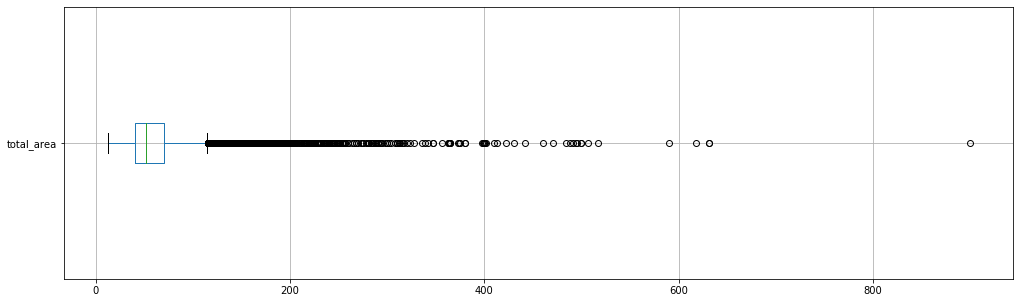

In [21]:
# построим диаграмму типа ящик с усами
data.boxplot(column='total_area', vert=False, figsize=(17, 5));

Всё что идёт выше 150 попадает в выбивающиеся значения, выстроим новую гистограмму с новыми параметрами. С крайней точкой в 300 м2, так как именно на этой цифре количество квартир с данной площадью почти сливается с 0.

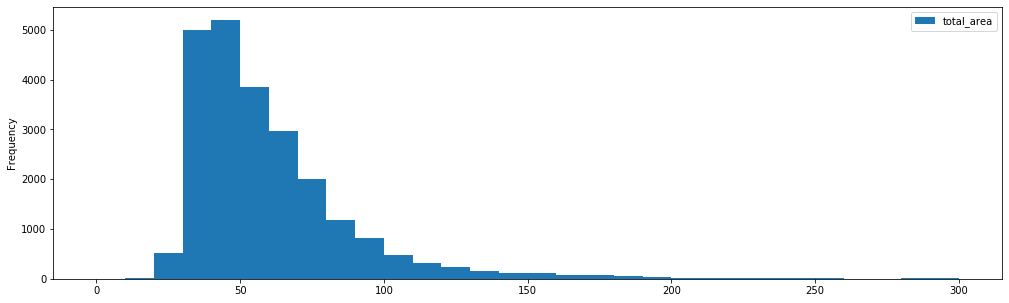

In [22]:
# Построим новую гистограмму для столбца 'total_area'
data.plot(y='total_area', kind='hist', range = (0, 300), bins = 30, figsize = (17,5));

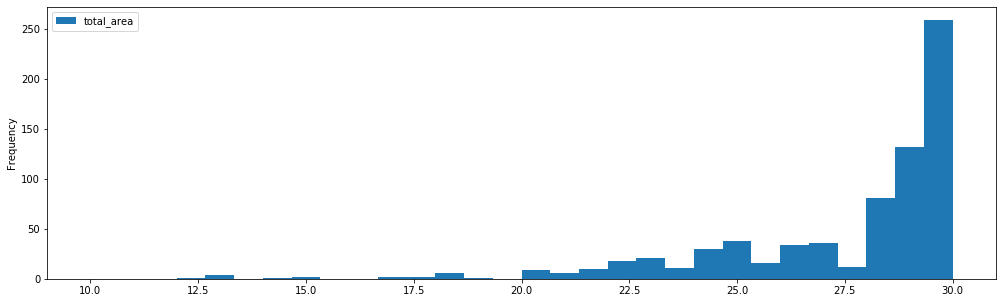

In [23]:
# Построим новую гистограмму для столбца 'total_area' чтобы рассмотреть минимальные значения
data.plot(y='total_area', kind='hist', range = (10, 30), bins = 30, figsize = (17,5));

In [24]:
# Выведем числовое описание данных для колонки 'total_area'
data['total_area'].describe()

count    23453.000000
mean        60.589877
std         35.618736
min         12.000000
25%         40.110000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Судя по методу describe площадь квартиры находятся в диапозоне от 40 до 70 метров и первый квартиль находится на уровне менее 40 метров, что выглядит правдоподобно.
Также все значения что привышают 300 метров или меньше 20 метров попадают в выбивающиеся значения, и судя по гистограмме типа plot, количество квартир с площадью свыше 300 метров уже приближаются к нулю. Проверим сколько у нас выбросов в процентах.

In [25]:
# Узнаем сколько в процентах у нас квартир с площадью свыше 300 метров
print('Квартир с площадью свыше 300 м2 у нас', len(data.query('total_area > 300')) / len(data) * 100, '%')

Квартир с площадью свыше 300 м2 у нас 0.2558308105572848 %


In [26]:
# Узнаем сколько в процентах у нас квартир с площадью ниже 20 метров
print('Квартир с площадью ниже 20 м2 у нас', len(data.query('total_area < 20')) / len(data) * 100, '%')

Квартир с площадью ниже 20 м2 у нас 0.08101309000980685 %


In [27]:
print('Всего квартир с площадью свыше 300м2 и ниже 20м2 у нас', len(data.query('total_area > 300')) / len(data) * 100
     + len(data.query('total_area < 20')) / len(data) * 100, '%')

Всего квартир с площадью свыше 300м2 и ниже 20м2 у нас 0.3368439005670916 %


In [28]:
# создадим новую таблицу, где у нас будут только строки соотвествующие условию площади квартиры от 20 до 300 м
good_data = data.query('20 <= total_area <= 300')

In [29]:
# Выведем новое числовое описание данных для колонки 'total_area'
good_data['total_area'].describe()

count    23374.000000
mean        59.732195
std         30.502519
min         20.000000
25%         40.102500
50%         52.000000
75%         69.800000
max        300.000000
Name: total_area, dtype: float64

В целом на статистику это никак не повлияло, так что оставляем как есть.

##### Вывод

В целом параметр площади выгладит хорошо. Среднее в 60 м2 не сильно отличается от медианы в 52м2. Я удалила такие выбросы как квартиры свыше 300 метров площади, и меньше 20 метров площади, что не сказалось на среднем и медиане. Мало квартир маленькой площадью и мало квартир большой площадью. Данное распределение похоже на нормальное.

#### Изучим параметр цены.

(0, 200000000)

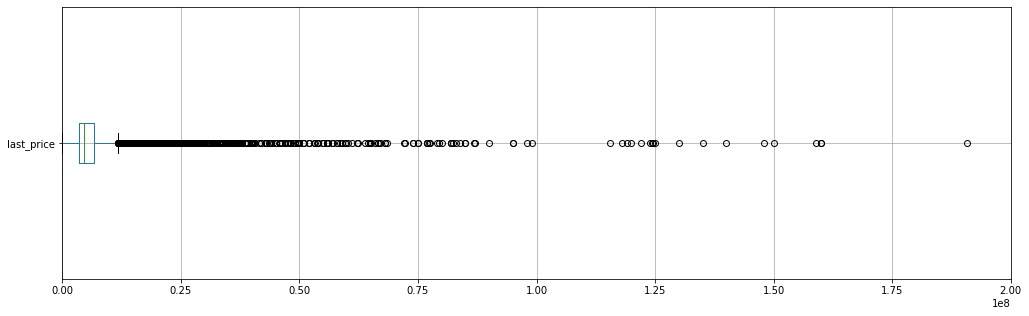

In [30]:
# построим диаграмму типа ящик с усами
good_data.boxplot(column='last_price', vert=False, figsize=(17, 5));
plt.xlim(0,200000000)

Всё что идёт выше 10 миллионов попадает в выбивающиеся значения, выстроим новую гистограмму с новыми параметрами.

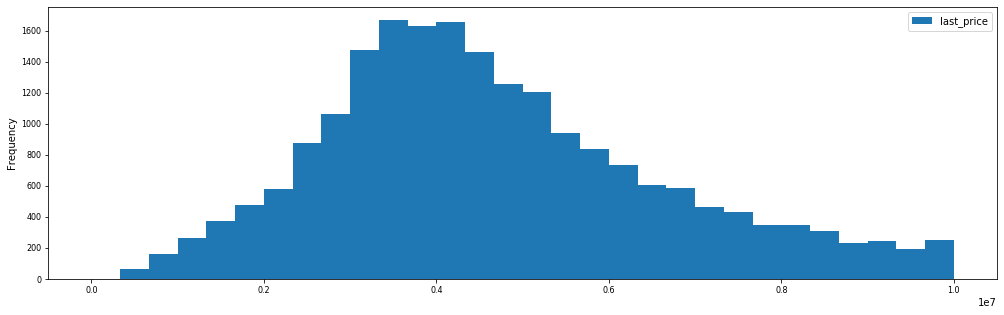

In [31]:
# Построим новую гистограмму для столбца 'last_price'
good_data.plot(y='last_price', kind='hist', range = (0, 10000000), bins = 30, fontsize=8, figsize = (17,5));

In [32]:
# Выведем числовое описание данных для колонки 'last_price'
good_data['last_price'].describe()

count    2.337400e+04
mean     6.336565e+06
std      7.803437e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [33]:
# Узнаем сколько у нас квартир с ценой ниже 20 тысяч рублей
print('Квартир с ценой ниже 20 тысяч рублей у нас', len(good_data.query('last_price < 50000')) / len(data) * 100, '%')

Квартир с ценой ниже 20 тысяч рублей у нас 0.004263846842621414 %


Удалим квартиры с такой низкой ценой, скорее всего это выбросы. Так как не может столько стоить квартира, ведь минимальная средняя цена идёт за 1 м2 в 55 тысяч.

In [34]:
good_data = good_data.query('last_price >= 50000')

In [35]:
# Узнаем сколько в процентах у нас квартир выше цены в 10 миллионов
print('Квартир с ценой выше 10 миллионов рублей у нас', len(good_data.query('last_price > 10000000')) / len(data) * 100, '%')

Квартир с ценой выше 10 миллионов рублей у нас 11.303457979789366 %


##### Вывод

Среднее в параметре цены сильно отличается от медианы. У нас много выбросов, около 11%, которые сильно влияют на среднее. Но в целом данное распределение нормальное. Много квартир в цене около 4х миллионов, мало дорогих и дешёвых квартир.
Я удалила из таблицы такие выбросы как квартиры с ценой ниже 50 тысяч рублей.

#### Изучим параметр количество комнат.

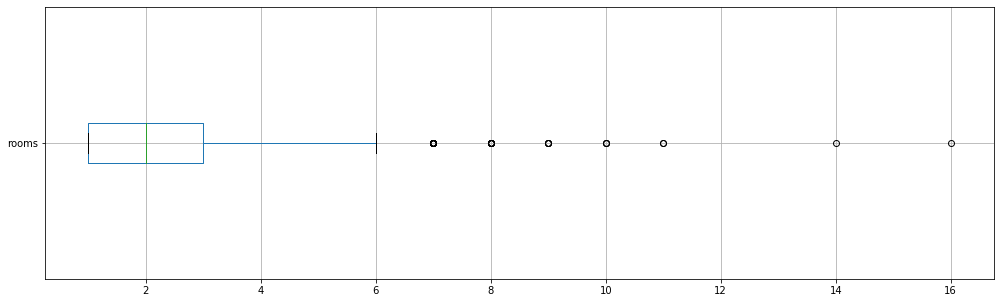

In [36]:
# построим диаграмму типа ящик с усами
good_data.boxplot(column='rooms', vert=False, figsize=(17, 5));

Всё что идёт выше 6 попадает в выбивающиеся значения, выстроим новую гистограмму с новыми параметрами

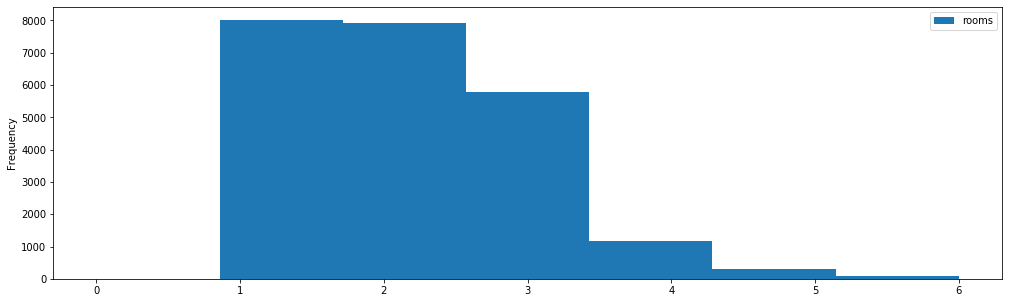

In [37]:
# Построим новую гистограмму для столбца 'rooms'
good_data.plot(y='rooms', kind='hist', range = (0, 6), bins = 7, figsize=(17, 5));

In [38]:
# Выведем числовое описание данных для колонки 'rooms'
good_data['rooms'].describe()

count    23373.000000
mean         2.076712
std          1.032864
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Судя по методу describe количество комнат находятся в диапозоне от 1 до 3 комнат и первый квартиль находится на уровне 1 комнаты, что выглядит правдоподобно.
Также все значения что привышают 8 комнат попадают в выбивающиеся значения, и судя по гистограмме типа plot, количество квартир с комнатами больше 8 уже приближаются к нулю. Проверим сколько у нас выбросов в процентах.

In [39]:
# Узнаем сколько в процентах у нас квартир c количеством комнат больше 8.
print('Квартир c количеством комнат больше 8 у нас', len(good_data.query('rooms > 8')) / len(data) * 100, '%')

Квартир c количеством комнат больше 8 у нас 0.046902315268835544 %


In [40]:
# создадим новую таблицу, где у нас будут только строки соотвествующие условию количества комнат меньше 8.
good_data = good_data.query('rooms <= 8')

In [41]:
# Выведем новое числовое описание данных для колонки 'rooms'
good_data['rooms'].describe()

count    23362.000000
mean         2.072639
std          1.014803
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

На статистику это не повлияло, так что оставляю так.

##### Вывод

Среднее и медиана в параметре комнат почти совпадают. Данное распределение похоже на распределение Пуассона. Но у нас не могла получится гистограмма с нормальным распределением, так как минимальное количество комнат - это одна комната. Квартир студий не так уж и много.
Я удалила все выбивающие значения, свыше 8 комнат, на статистику это никак не повлияло.

#### Изучим параметр высота потолков.

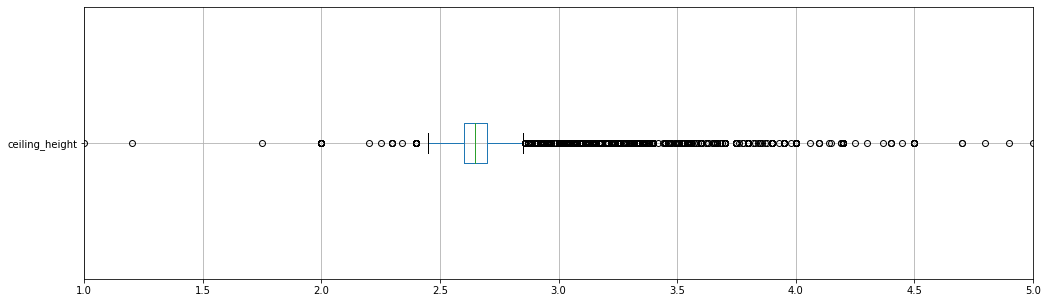

In [42]:
# построим диаграмму типа ящик с усами
good_data.boxplot(column='ceiling_height', vert=False, figsize=(17, 5))
plt.xlim(1,5);

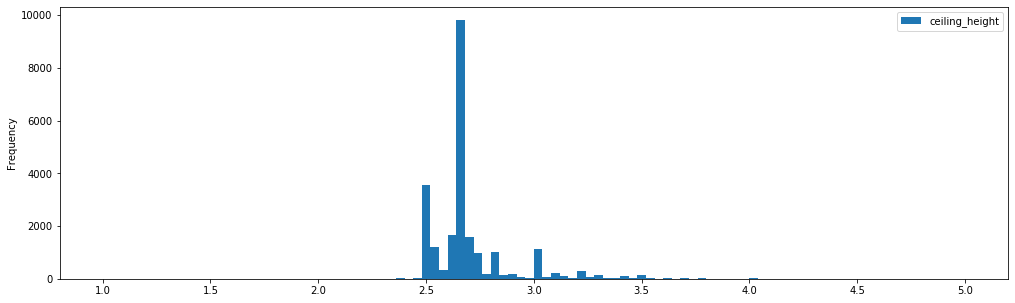

In [43]:
# Построим новую гистограмму для столбца 'ceiling_height'
good_data.plot(y='ceiling_height', kind='hist', range = (1, 5), bins = 100, figsize=(17, 5));

In [44]:
# Выведем числовое описание данных для колонки 'ceiling_height'
good_data['ceiling_height'].describe()

count    23362.000000
mean         2.721901
std          0.981323
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Судя по методу describe большинство потолков находятся в диапозоне от 2,6 до 2,7 метров и первый квартиль находится на уровне менее 2,6 метров, что выглядит правдоподобно.
Также все значения что привышают 4 метров попадают в выбивающиеся значения, и судя по гистограмме типа plot, количество потолков свыше 4 метров уже приближаются к нулю. Проверим сколько у нас выбросов в процентах. 

In [45]:
# Узнаем сколько в процентах у нас квартир с высотой потолков свыше 4 метров
print('Квартир с высотой потолков свыше 4 метров у нас', len(good_data.query('ceiling_height > 4')) / len(data) * 100, '%')

Квартир с высотой потолков свыше 4 метров у нас 0.2899415852982561 %


In [46]:
# Узнаем сколько в процентах у нас квартир с высотой потолков ниже 2 метров
print('Квартир с высотой потолков ниже 2 метров у нас', len(good_data.query('ceiling_height < 2')) / len(data) * 100, '%')

Квартир с высотой потолков ниже 2 метров у нас 0.012791540527864239 %


In [47]:
print('Всего квартир с высотой потолков ниже 2 метров и выше 4 метров у нас',
      len(good_data.query('ceiling_height > 4')) / len(data) * 100
      + len(good_data.query('ceiling_height < 2')) / len(data) * 100, '%')

Всего квартир с высотой потолков ниже 2 метров и выше 4 метров у нас 0.30273312582612033 %


In [48]:
# Cоздадим новую таблицу, где у нас будут только строки соотвествующие условию высоты полотков от 2 до 4 метров.
good_data = good_data.query('2 <= ceiling_height <= 4')

In [49]:
# Выведем новое числовое описание данных для колонки 'ceiling_height'
good_data['ceiling_height'].describe()

count    23291.000000
mean         2.692087
std          0.203075
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

На статистику это не повлияло, так что оставляет так.

##### Вывод

Среднее и медиана в параметре комнат почти совпадают. Данное распределение похоже на нормальное распределение. У нас мало квартир с высобой потолков меньше 2,5 метров, и мало квартир с высотой потолков свыше 3 метров.
Я удалила такие выбросы, как количетсво комнат свыше 4метров и ниже 2х, что не повлияло на статистику.

### Изучение параметра 'время продажи квартиры'

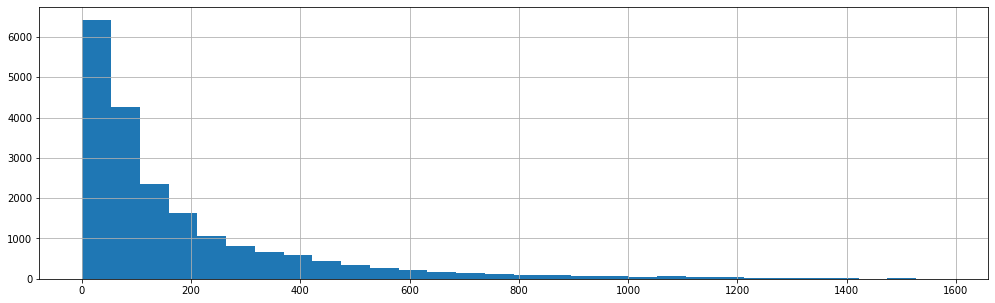

In [50]:
# Построим гистограмму для столбца 'days_exposition'
good_data['days_exposition'].hist(bins = 30, figsize=(17, 5));

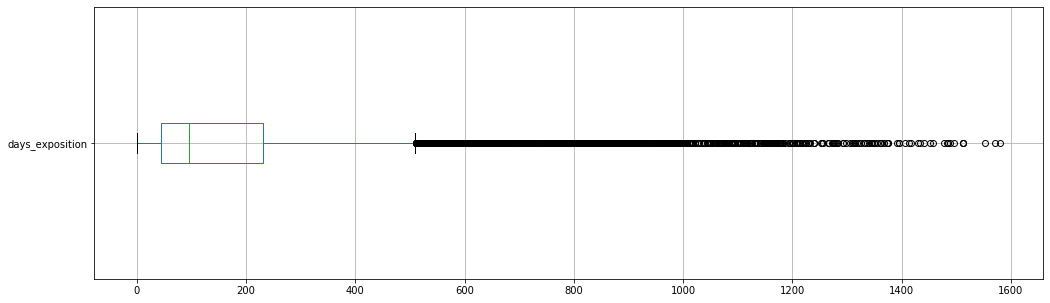

In [51]:
# построим диаграмму типа ящик с усами
good_data.boxplot(column='days_exposition', vert=False, figsize=(17, 5));

In [52]:
# Выведем числовое описание данных для колонки 'days_exposition'
good_data['days_exposition'].describe()

count    20155.000000
mean       180.928752
std        219.572824
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Вывод

Среднее время продажи в 180 дней почти в 2 раза отличается от медианы этого же столбца в 95 дней. У нас скорее всего много выбросов с длинным временем продажи, что сильно влияет на среднее.
Но в целом продажи в основном проходят в диапазоне от 45 до 230 дней, что выглядит адекватно.
Распределение по нашей гистограмме похоже на распределение Пуассона.

### Какие факторы больше всего влияют на стоимость квартиры? 

#### Зависимость стоимости от таких факторов, как общая площадь, число комнат, удалённости от центра.

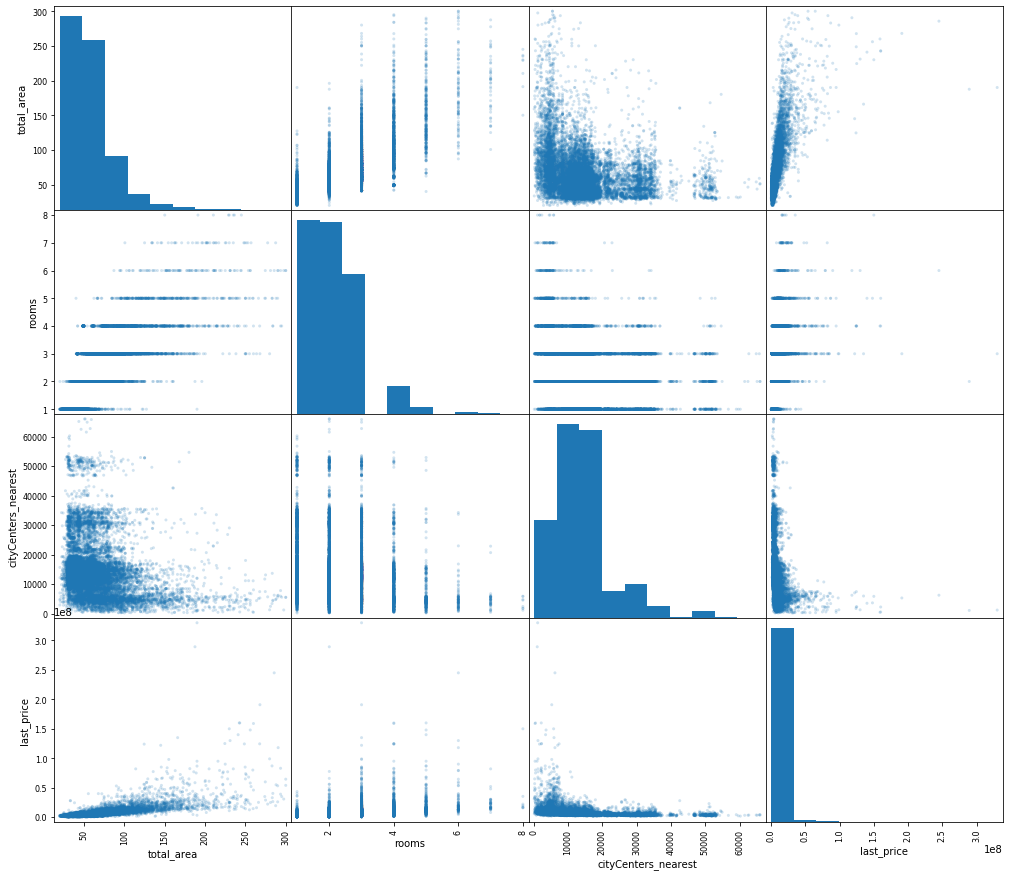

In [53]:
# Создадим отдельную таблицу со столбцами 'total_area', 'rooms', 'cityCenters_nearest' и 'last_price'
data_1 = good_data[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']]

# И попарно выстроим точечные диаграммы для столбцов датафрейма
pd.plotting.scatter_matrix(data_1, figsize=(17, 15), alpha = 0.2);

In [54]:
# Высчитаем коэффициент корреляции Пирсона между всеми парами столбцов
data_1.corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.781742,-0.249461,0.674223
rooms,0.781742,1.000000,-0.184606,0.390823
cityCenters_nearest,-0.249461,-0.184606,1.000000,-0.260688
last_price,0.674223,0.390823,-0.260688,1.000000


##### Вывод

Просмотрим нижние 4 рисунка. По первому рисунку можно увидеть взаимозависимость между ценой и общей площадью. И увидеть зависимость, что чем больше площадь, тем выше цена. Но не в соотношении 1 к 1, видимо если площадь совсем большая, то цена за метр может быть ниже.

По второму рисунку можно увидеть зависимость между ценой и количеством комнат. Если не обращать внимание на выбросы по цене, то чем больше комнат, тем выше цена. Это правило сохраняется вплоть до 4 комнатных квартир, далее идёт снижение. Есть положительная зависимость между ценой и количеством комнат, но это скорее связанно с площадью квартиры (чем больше комнат, тем больше площадь), чем как таковая зависимость от количества комнат.

На третьем рисунке видна отрицательная зависимость между расстоянием от центра и ценой квартиры, что логично. Чем дальше квартира от центра, тем меньше она стоит.

Четвертый рисунок это зависимость цены от цены, его рассматривать не будем.

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

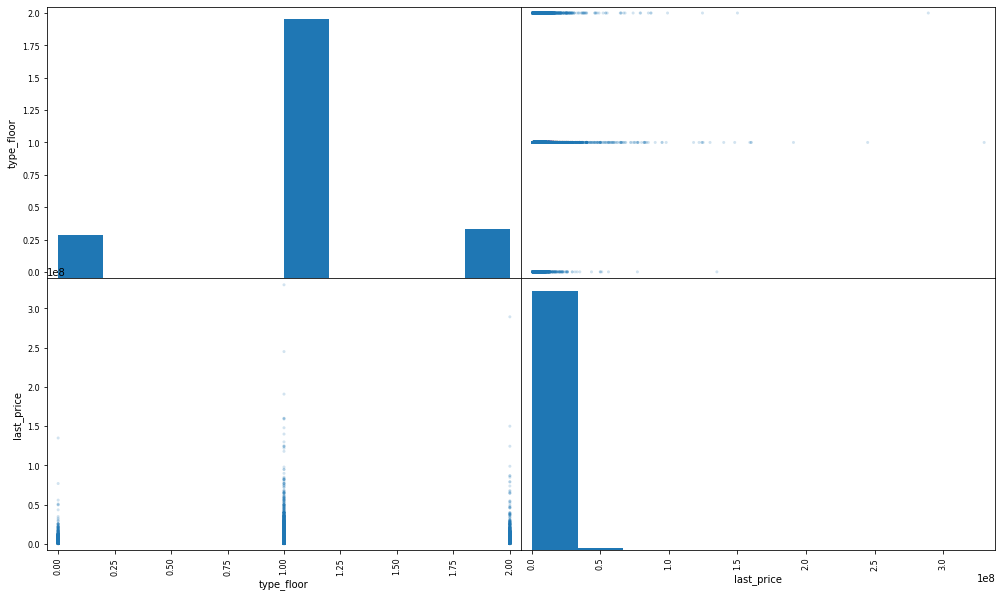

In [55]:
# Создадим отдельную таблицу со столбцами 'type_floor' и 'last_price'
data_2 = good_data[['type_floor', 'last_price']]

# И попарно выстроим точечные диаграммы для столбцов датафрейма
pd.plotting.scatter_matrix(data_2, figsize=(17, 10), alpha = 0.2);

##### Вывод

В пересечении столбца type_floor и last_price заметно, что квартиры находящиеся на первой этаже (0 в графике) имеют наименьшую цену. Квартиры на последнем этаже и других этажах(2 и 1 в графике) имеют цену выше, чем на первом этаже, и они примерно равны между собой, но всё же квартиры находящиеся ни на первом, ни на последних этажах по цене чуть выше вариантов на последнем этаже.

Низкие цены на первом этаже могут быть связаны с неудобствами квартирантов: постоянные прохожие, необходимость ставить решетки, близость подвала (насекомые, грызуны), большая слышимость прохожих и автомобилей.

Также на последних этажах тоже есть неудоства, связанные с запахом из мусоропровода (если он есть) и наличием чердака (грызуны, птицы, повышенная влажность в связи с расположением оборудования на чердаках домов).

#### Зависимость цены от даты размещения: дня недели, месяца и года

Рассмотрим зависимость цены от размещения объявления: года, месяца и дня недели.

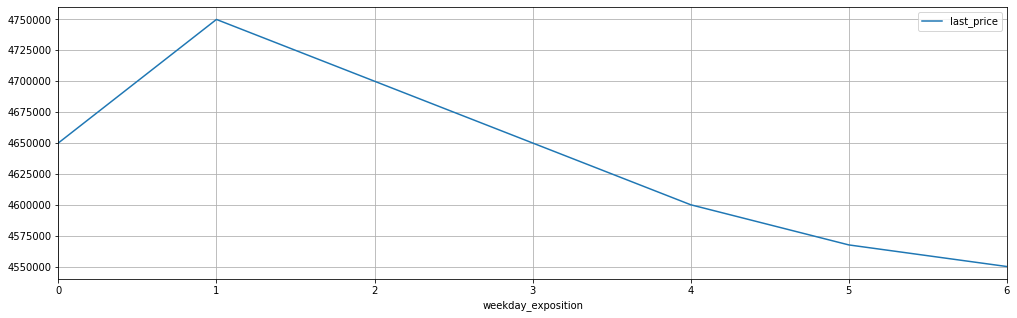

In [56]:
# Создадим отдельную таблицу со столбцами 'last_price' и 'weekday_exposition'
data_4 = good_data[['last_price', 'weekday_exposition']]

# Создадим новую таблицу, в которой будет день размещения и медианная цена продажи квартиры
weekday_price = data_4.pivot_table(
    index = 'weekday_exposition', values = 'last_price', aggfunc = 'median')

# Построим график зависимости цены от дня размещения
weekday_price.plot(figsize=(17, 5), grid=True);

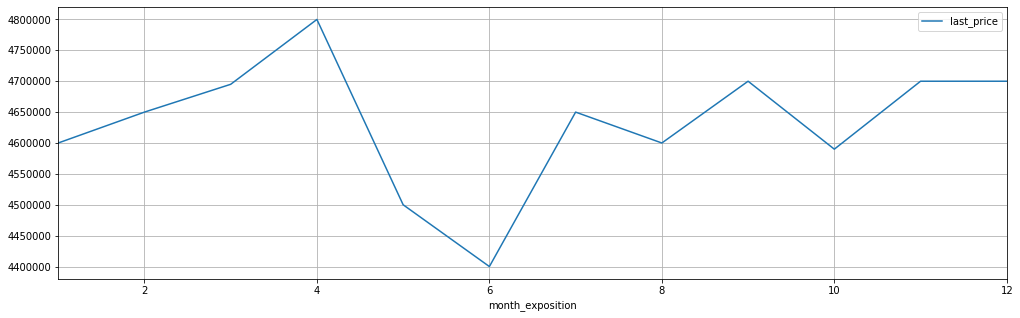

In [57]:
# Создадим отдельную таблицу со столбцами 'last_price' и 'month_exposition'
data_5 = good_data[['last_price', 'month_exposition']]

# Создадим новую таблицу, в которой будет месяц размещения и медианная цена продажи квартиры
month_price = data_5.pivot_table(
    index = 'month_exposition', values = 'last_price', aggfunc = 'median')

# Построим график зависимости цены от месяца размещения
month_price.plot(figsize=(17, 5), grid=True);

Для рассмотрения зависимость цены от года построим обычный график с кривой.

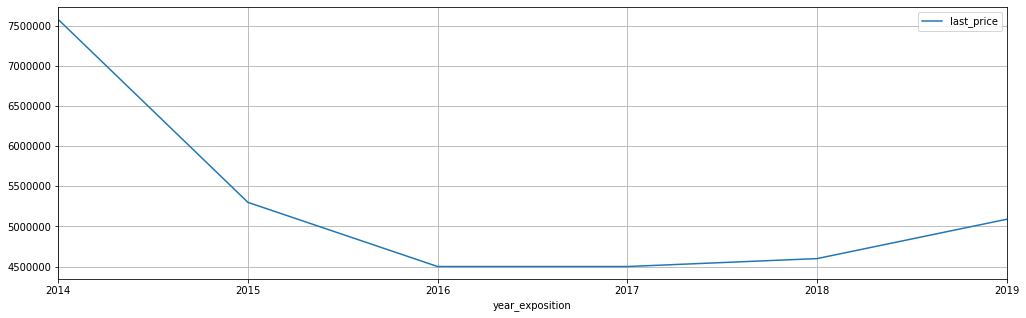

In [58]:
# Создадим отдельную таблицу со столбцами 'last_price' и 'year_exposition'
data_6 = good_data[['last_price', 'year_exposition']]

# Создадим новую таблицу, в которой будет год размещения и медианная цена продажи квартиры
year_price = data_6.pivot_table(
    index = 'year_exposition', values = 'last_price', aggfunc = 'median')

# Построим график зависимости цены от года размещения
year_price.plot(figsize=(17, 5), grid=True);

##### Вывод

В первом графике указана **взаимосвязь между ценой и днём размещения объявления**
Объявления размещённые в 0 и 4, 5 и 6 день недели (понедельник и пятница, суббота и воскресение) имеют цену ниже остальных дней.

Второй график показывает **взаимосвязь  между ценой и месяцем размещения объявления**.
В целом какой-то взаимосвязи нет. Только в 6 месяце (июнь) идёт просадка по цене.

Третий график показывает **взаимосвязь между ценой и годом размещения объявления**.
Максимальная цена была в 2014 году и начала сильно снижаться, видимо это связано с кризисом 2014 года. В 2016 году цена перестала критически снижаться, и с 2017 года начала немного расти. Это скорее всего связано с выходом из кризиса.
И на конец 2019 цена продолжала повышаться.

### 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [59]:
# Посмотрим все населённые пункты и количество объявлений на каждый населённый пункт
# с помощью "value_counts"
good_data['locality_name'].value_counts().head(10)

Санкт-Петербург      15476
посёлок Мурино         494
посёлок Шушары         436
Всеволожск             391
Пушкин                 365
Колпино                337
посёлок Парголово      323
Гатчина                306
деревня Кудрово        283
Выборг                 236
Name: locality_name, dtype: int64

In [60]:
# Создадим переменную с перечислением наших 10 населённых пунктов
name_top_10_locality = [
    'Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 
    'Гатчина', 'Колпино', 'посёлок Парголово', 'деревня Кудрово', 'Выборг'
]

# Создадим новую таблицу, в которой будут только объявления из наших 10 населённых пунктов
data_top_10_locality = good_data.query('locality_name == @name_top_10_locality')

# Создадим новую таблицу, в которой будет название населённого пункта 
# и средняя цена квадратного метра для каждого населённого пункта
average_price_of_locality = data_top_10_locality.pivot_table(
    index = 'locality_name', values = 'price_meter')

# Выведем последнюю таблицу и отсортируем по возрастанию
average_price_of_locality.sort_values(by = 'price_meter')

,price_meter
locality_name,
Выборг,58093.893157
Всеволожск,68568.269037
Гатчина,68757.678644
Колпино,75333.295801
посёлок Шушары,78405.738420
посёлок Мурино,85071.279587
посёлок Парголово,90289.778393
деревня Кудрово,92297.218847
Пушкин,103017.827567


#### Вывод

С самой низкой средней ценой квадратного метра является населённый пункт Выборг (55884 р / м2)
С самой высокой ценой квадратного метра - Санкт-Петербург (112840,5 р / м2)

### Какая область входит в центр Санкт-Петербурга?

Выясним, какая область входит в центр.

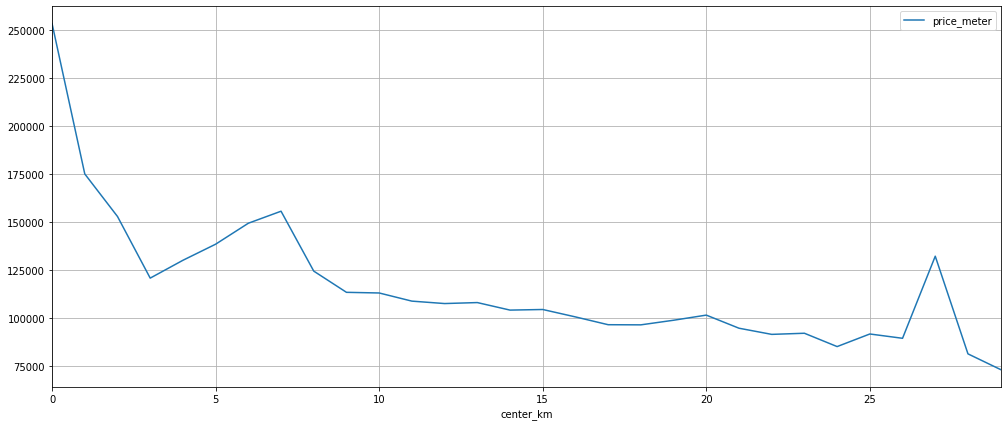

In [61]:
# Создадим новую таблицу, где у нас будет только объявления города Санкт-Петербурга.
sankt_peterburg = ['Санкт-Петербург']
data_sankt_peterburg = good_data.query('locality_name == @sankt_peterburg')

# Создадим столбец c расстоянием до центра в километрах 
data_sankt_peterburg['center_km'] = data_sankt_peterburg['cityCenters_nearest'] / 1000

# И округлим его до целых значений
data_sankt_peterburg['center_km'] = round(data_sankt_peterburg['center_km'])

# Создадим новую таблицу, в которой будет расстояние до центра
# и средняя цена квадратного метра для каждого км
km_price = data_sankt_peterburg.pivot_table(
    index = 'center_km', values = 'price_meter')

# Построим график зависимости цены за м2 и удалённости от центра в км
km_price.plot(figsize=(17, 7), grid=True);

#### Вывод

Там где график сильно меняется — это центральная зона. Судя по графику, вертикальная ось - средняя цена за километр, а горизонтальная - удалённость от центра в км, центр города составляет в радиусе 3 км.

### Изучение квартир в Санкт-Петербурге

Для начала создадим таблицу с квартирами находящихся максимум в 3 км от центра

In [62]:
# Создадим таблицу с помощью метода query
centr_sankt_peterburg = data_sankt_peterburg.query('center_km <= 3')

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

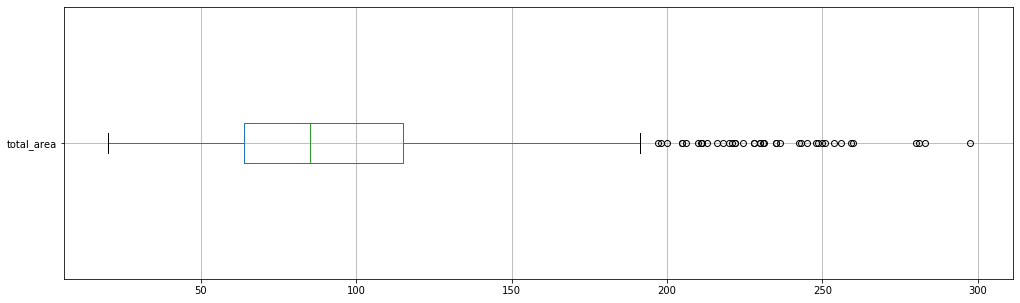

In [63]:
# построим диаграмму типа ящик с усами
centr_sankt_peterburg.boxplot(column='total_area', vert=False, figsize=(17, 5));

Всё что идёт выше 180 попадает в выбивающиеся значения. Сравним гистограмму для квартир в центре города с гистограммой по Санкт-Петербургу.

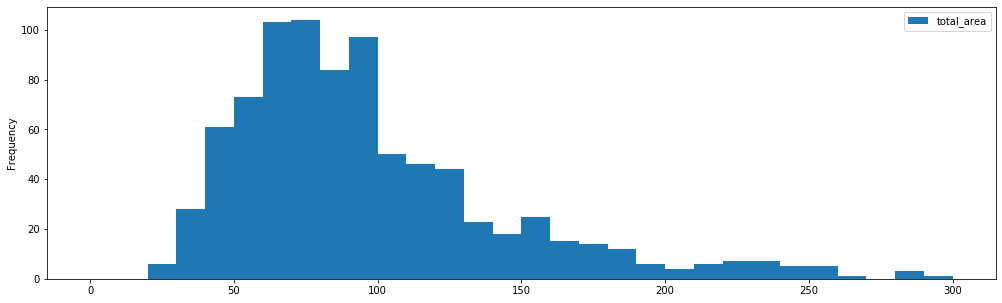

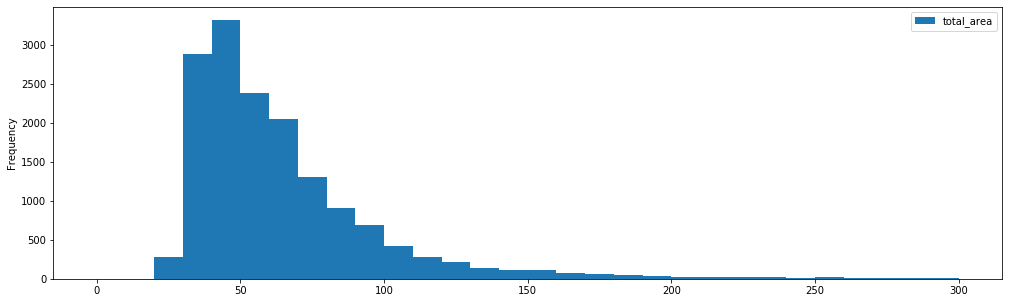

In [64]:
# Построим новую гистограмму для столбца 'total_area' для квартир в центре города
centr_sankt_peterburg.plot(y='total_area', kind='hist', range = (0, 300), bins = 30, figsize=(17, 5))

# И выведем общую гистограмму для этого же столбца для Санкт-Петербурга
data_sankt_peterburg.plot(y='total_area', kind='hist', range = (0, 300), bins = 30, figsize=(17, 5));

In [65]:
# Выведем числовое описание данных для колонки 'total_area' таблицы для квартир Санкт-Петербурга в 3 км от центра
centr_sankt_peterburg['total_area'].describe()

count    848.000000
mean      95.925377
std       47.333208
min       20.000000
25%       63.925000
50%       85.000000
75%      115.000000
max      297.500000
Name: total_area, dtype: float64

In [66]:
# Выведем числовое описание данных для колонки 'total_area' для Санкт-Петербурга
data_sankt_peterburg['total_area'].describe()

count    15476.000000
mean        63.509604
std         33.361738
min         20.000000
25%         42.000000
50%         55.000000
75%         74.200000
max        300.000000
Name: total_area, dtype: float64

Средняя площадь сместилась с 63 м2 до 95 м2, также сместилась и медиана с 55 метров до 85 метров.
Это указывает, что квартиры в центре города имеют большую площадь, чем квартиры в городе в целом.

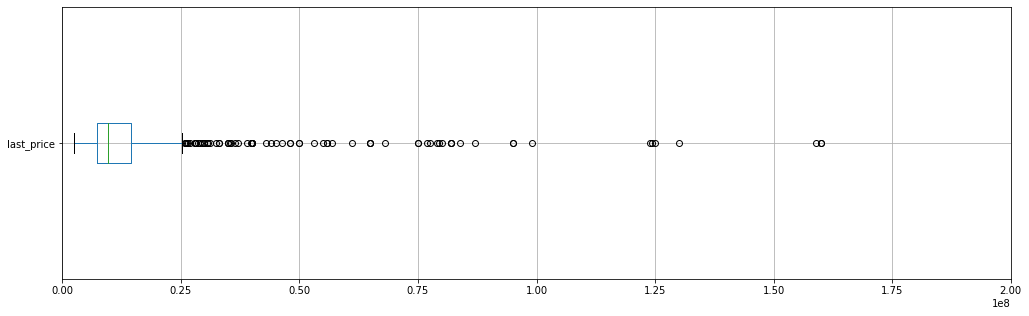

In [67]:
# построим диаграмму типа ящик с усами
centr_sankt_peterburg.boxplot(column='last_price', vert=False, figsize=(17, 5))
plt.xlim(0,200000000);

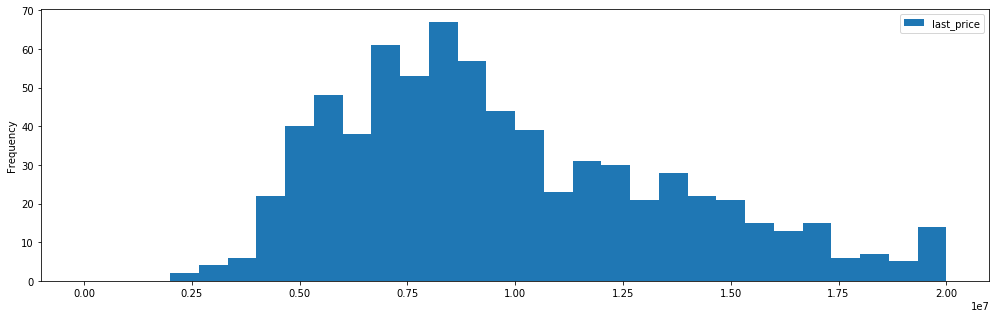

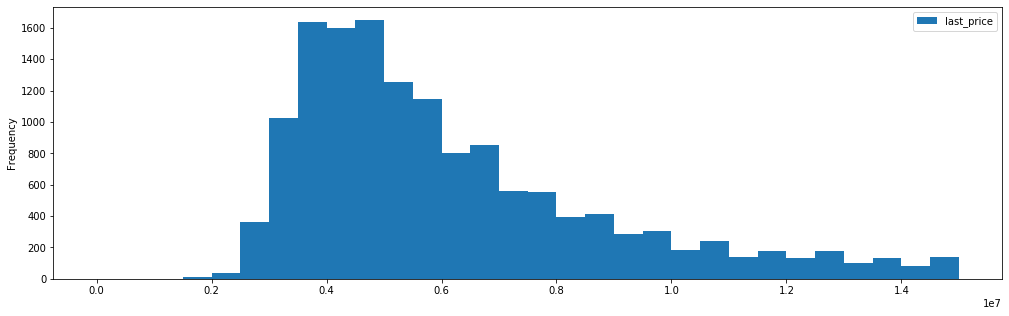

In [68]:
# Построим новую гистограмму для столбца 'last_price' для квартир в центре города
centr_sankt_peterburg.plot(y='last_price', kind='hist', range = (0, 20000000), bins = 30, figsize=(17, 5))

# И выведем общую гистограмму для этого же столбца для Санкт-Петербурга
data_sankt_peterburg.plot(y='last_price', kind='hist', range = (0, 15000000), bins = 30, figsize=(17, 5));

In [69]:
# Выведем числовое описание данных для колонки 'last_price' таблицы для квартир Санкт-Петербурга в 3 км от центра
centr_sankt_peterburg['last_price'].describe()

count    8.480000e+02
mean     1.535177e+07
std      2.254872e+07
min      2.385000e+06
25%      7.300000e+06
50%      9.700000e+06
75%      1.456250e+07
max      3.300000e+08
Name: last_price, dtype: float64

In [70]:
# Выведем числовое описание данных для колонки 'last_price' для Санкт-Петербурга
data_sankt_peterburg['last_price'].describe()

count    1.547600e+04
mean     7.698770e+06
std      8.965857e+06
min      1.200000e+06
25%      4.200000e+06
50%      5.500000e+06
75%      8.100000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Средняя цена сместилась с 7,5 до 10,5 миллионов, также сместилась и медиана с 5.5 миллионов до 9,6 миллионов.
Это указывает, что цена квартир в центре Санкт-Петербурга на 40% выше, чем в городе в целом.

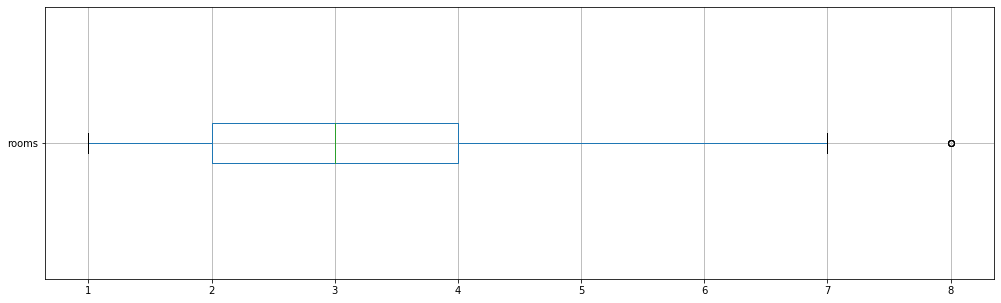

In [71]:
# построим диаграмму типа ящик с усами
centr_sankt_peterburg.boxplot(column='rooms', vert=False, figsize=(17, 5));

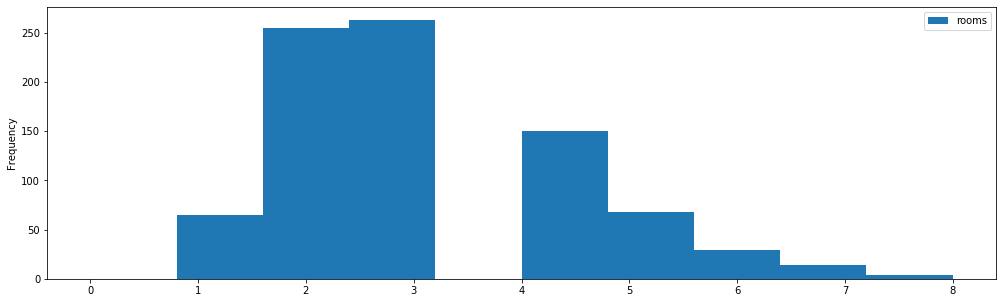

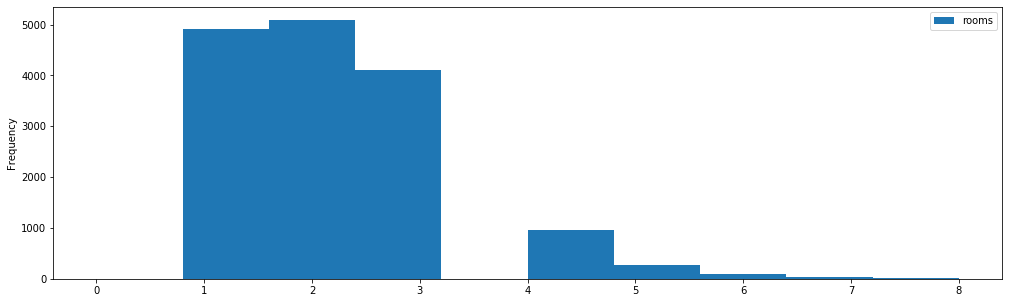

In [72]:
# Построим новую гистограмму для столбца 'rooms' для квартир в центре Питера
centr_sankt_peterburg.plot(y='rooms', kind='hist', range = (0, 8), bins = 10, figsize=(17, 5))

# И выведем общую гистограмму для этого же столбца для Санкт-Петербурга
data_sankt_peterburg.plot(y='rooms', kind='hist', range = (0, 8), bins = 10, figsize=(17, 5));

In [73]:
# Выведем числовое описание данных для колонки 'rooms' таблицы для квартир Санкт-Петербурга в 9 км от центра
centr_sankt_peterburg['rooms'].describe()

count    848.000000
mean       3.075472
std        1.338368
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: rooms, dtype: float64

In [74]:
# Выведем числовое описание данных для колонки 'rooms' для Санкт-Петербурга
data_sankt_peterburg['rooms'].describe()

count    15476.000000
mean         2.163867
std          1.067191
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Средняя количество комнат сместилось с 2 до 3, также сместилась и медиана с 2 до 3 комнат.
Также по гистограмме видно, что однокомнатных квартир в центре Санкт-петербурга гораздо меньше, чем в городе в целом. И данная гистограмма больше похожа на нормальное распределение.
Это указвает на то, что в центре Питера мало однокомнатных квартир, и в основном присутсвуют 3х комнатные.

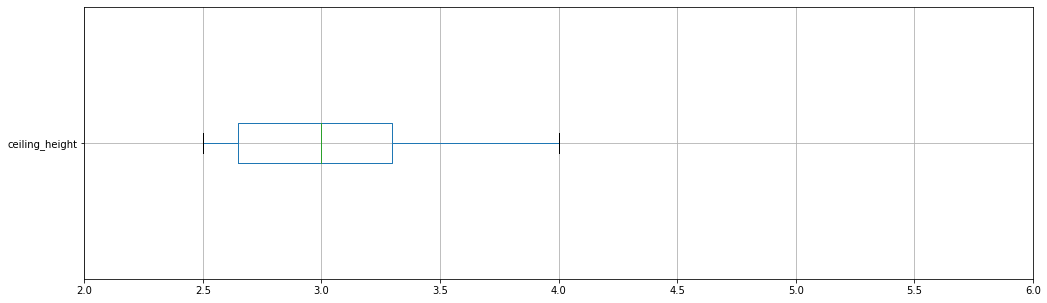

In [75]:
# построим диаграмму типа ящик с усами
centr_sankt_peterburg.boxplot(column='ceiling_height', vert=False, figsize=(17, 5))
plt.xlim(2,6);

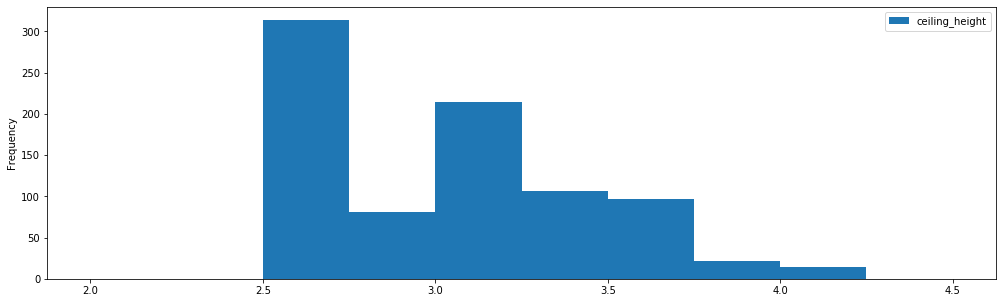

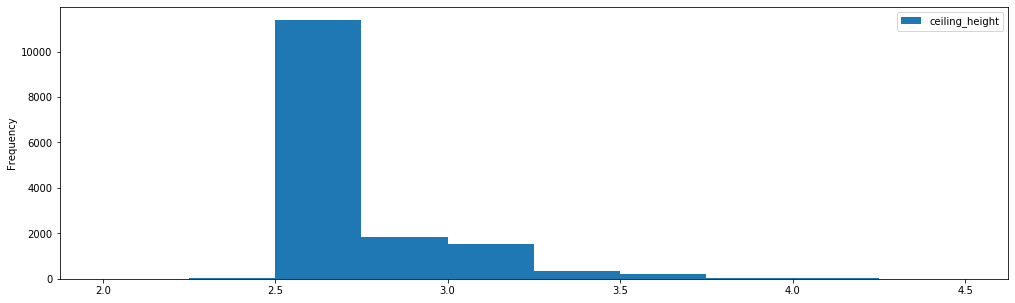

In [76]:
# Построим новую гистограмму для столбца 'ceiling_height' для квартир в центре Питера
centr_sankt_peterburg.plot(y='ceiling_height', kind='hist', range = (2, 4.5), bins = 10, figsize=(17, 5))

# Построим новую гистограмму для столбца 'ceiling_height' для Санкт-Петербурга
data_sankt_peterburg.plot(y='ceiling_height', kind='hist', range = (2, 4.5), bins = 10, figsize=(17, 5));

In [77]:
# Выведем числовое описание данных для колонки 'ceiling_height' таблицы для квартир Санкт-Петербурга в 9 км от центра
centr_sankt_peterburg['ceiling_height'].describe()

count    848.000000
mean       3.021450
std        0.370691
min        2.500000
25%        2.650000
50%        3.000000
75%        3.300000
max        4.000000
Name: ceiling_height, dtype: float64

In [78]:
# Выведем числовое описание данных для колонки 'ceiling_height' для Санкт-Петербурга
data_sankt_peterburg['ceiling_height'].describe()

count    15476.000000
mean         2.716932
std          0.226090
min          2.000000
25%          2.600000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

Гистограмма по высоте потолков в центре Питера "шумнее", чем в общем выборке. 
В целом высота потолков изменилась по среднему значению с 2,75 до 3 метров, и по медиане увеличилась с 2,6 до 3 метров. 
Это указывает на то, что потолки в центре Питера немного выше, чем в остальном городе.

##### Вывод

По сравнению с городом в целом, в центре Санкт-Петербурга квартиры больше по площади, соответственно имеют больше комнат и стоят дороже. В центре города где-то на 30% больше площадь, количество комнат в квартире. Цена же выше где то процентов на 40, что указывает на большую стоимость за м2. Высота полотков немного выше чем в общей выборке.

#### Зависимость стоимости от таких факторов, как число комнат, этаж, удалённость от центра.

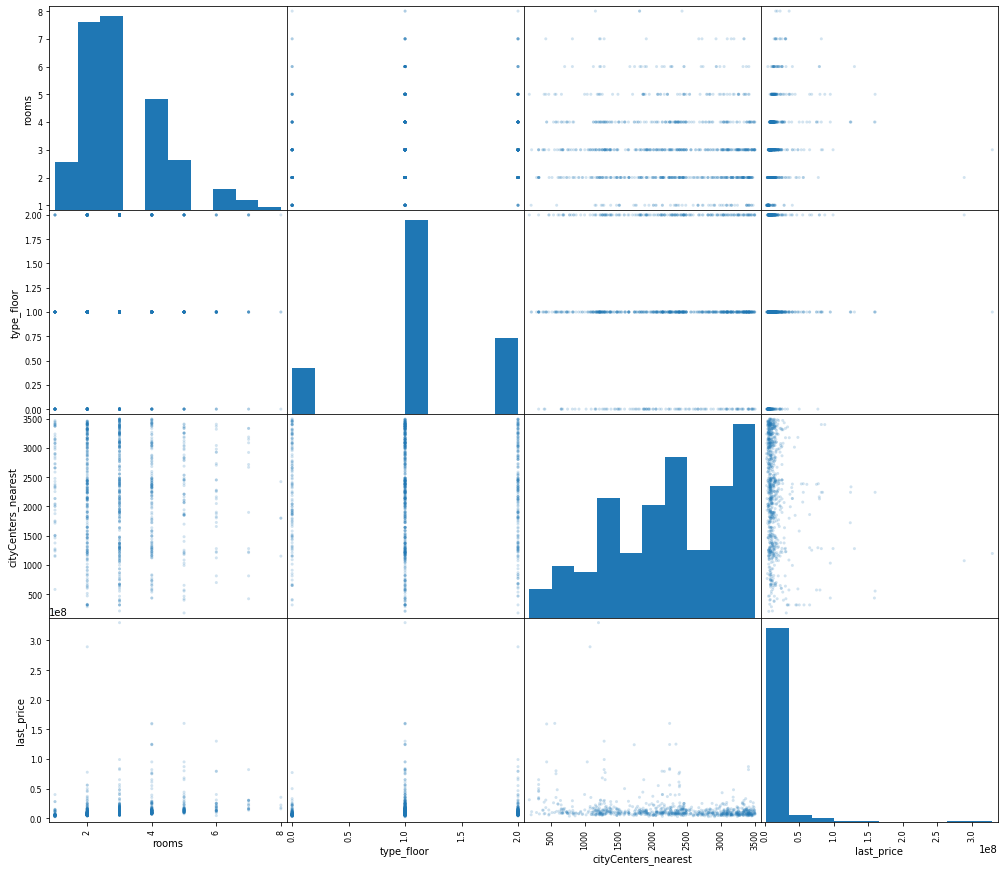

In [79]:
# Создадим отдельную таблицу со столбцами 'rooms', 'type_floor', 'cityCenters_nearest' и 'last_price'
data_centr = centr_sankt_peterburg[['rooms', 'type_floor', 'cityCenters_nearest', 'last_price']]

# И попарно выстроим точечные диаграммы для столбцов датафрейма
pd.plotting.scatter_matrix(data_centr, figsize=(17, 15), alpha = 0.2);

In [80]:
# Высчитаем коэффициент корреляции Пирсона между всеми парами столбцов
data_centr.corr()

,rooms,type_floor,cityCenters_nearest,last_price
rooms,1.000000,0.106075,-0.077472,0.216363
type_floor,0.106075,1.000000,-0.005857,0.049828
cityCenters_nearest,-0.077472,-0.005857,1.000000,-0.191509
last_price,0.216363,0.049828,-0.191509,1.000000


##### Вывод

Рассмотрим наши графики, нижнюю строку, здесь в первых трёх рисунках показана зависимость цены от количества комнат, этажа и удалённости от центра.

В первом рисунке указана зависимость от количества комнат.
Самые дорогие идут квартиры с 4 и 5ю комнатами.
Больше всего продавалось квартир с 2мя и 3мя комнатами, об этом говорит более жирная линия.

Во втором рисунке показана зависимость от этажа размещения, где 0 - это первый этаж, 2 - последний, и 1 - другой.
Здесь идёт распределение, что квартиры на первом этаже имеют самую низкую стоимость, а квартиры с последних и других этажей имеют примерно одинаковую стоимость. Линия квартир на других этажах имеет более жирную структуру, что указывает, что таких предложений больше, чем предложений на последних этажах, что логично.
То что квартиры на последних этажах стоят дороже, чем в городе в целом, указывает что у жителей верхних этажей помимо основных неудоств появляются и преимущества, например, панорама открывающуюся из окна.
Это отличается от выборки по всей таблице, где цены за квартиры с последних этажей такие же низкие, как и для квартир с первых этажей.

На третьем рисунке показана зависимость от удаленности от центра.
Здесь нет никакой особенной зависимости от скольки км квартира от центра. Распределение примерно одинаково.
В отличии от выборки по всей таблице, где видно, что чем ближе квартира к центру, тем она дороже.

#### Зависимость стоимости от даты размещения объявления.

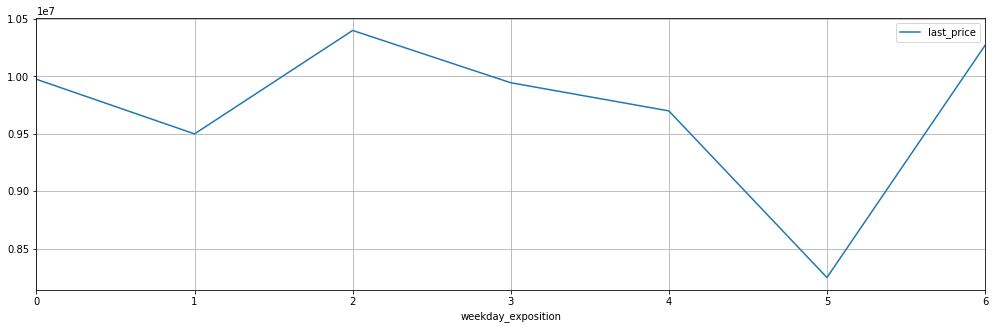

In [81]:
# Создадим отдельную таблицу со столбцами 'last_price' и 'weekday_exposition'
data_centr3 = centr_sankt_peterburg[['last_price', 'weekday_exposition']]

# Создадим новую таблицу, в которой будет день размещения и медианная цена продажи квартиры
weekday_price_centr = data_centr3.pivot_table(
    index = 'weekday_exposition', values = 'last_price', aggfunc = 'median')

# Построим график зависимости цены от дня размещения
weekday_price_centr.plot(figsize=(17, 5), grid=True);

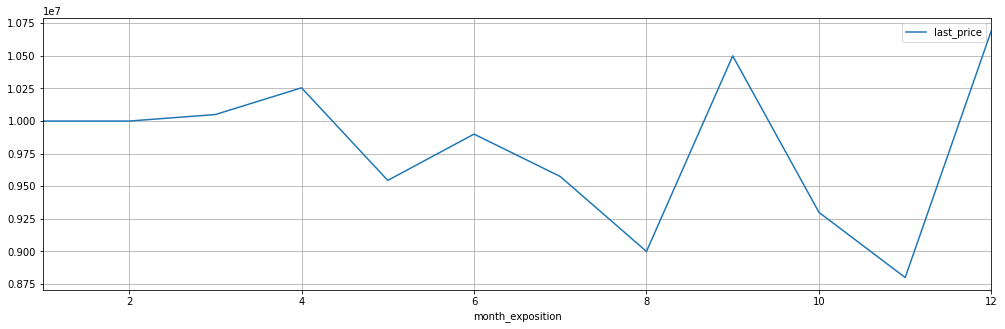

In [82]:
# Создадим отдельную таблицу со столбцами 'last_price' и 'month_exposition'
data_centr4 = centr_sankt_peterburg[['last_price', 'month_exposition']]

# Создадим новую таблицу, в которой будет месяц размещения и медианная цена продажи квартиры
month_price = data_centr4.pivot_table(
    index = 'month_exposition', values = 'last_price', aggfunc = 'median')

# Построим график зависимости цены от месяца размещения
month_price.plot(figsize=(17, 5), grid=True);

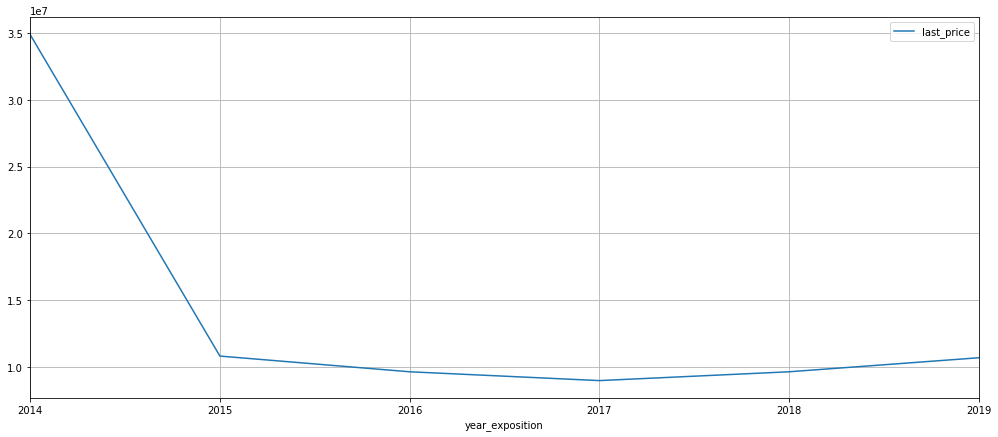

In [83]:
# Создадим отдельную таблицу со столбцами 'year_exposition' и 'last_price'
data_centr5 = centr_sankt_peterburg[['year_exposition', 'last_price']]

# Создадим новую таблицу, в которой будет год размещения и медианная цена продажи квартиры
year_price_centr = data_centr5.pivot_table(
    index = 'year_exposition', values = 'last_price', aggfunc = 'median')

# Построим график зависимости цены от года размещения
year_price_centr.plot(figsize=(17, 7), grid=True);

##### Вывод

В первом графике указана **взаимосвязь между ценой и днём размещения объявления**
Объявления размещённые в 5 недели (суббота) имеют цену ниже остальных дней.

Второй график показывает **взаимосвязь  между ценой и месяцем размещения объявления**.
В целом какой-то взаимосвязи нет. Только в 8 и 11 месяцах (август и ноябрь) идёт просадка по цене.

Третий график показывает **взаимосвязь между ценой и годом размещения объявления**.
Наибольшая цена была в 2014 году, после чего начала стремительно снижать, в 2015 году снижение стало менее заметным, но все же продолжалось до 2017, после которого начало понемногу расти.

В общей же таблице цена с 2016 до 2017 года была стабильной, низкой, но стабильной.

Более дорогих квартир кризис коснулся сильнее.

## Общий вывод

В таблице очень много пропущенных значений и аномальных значений, заполненных людьми или же не заполненными системой.
Большинство пропущенных значений я заменила на медианы (как раз по причине присутствия аномальных значений, например, в высоте потолков есть квартира со значением 100 метров), или же на медианы в разрезе с другими значениями.
Также удали выбросы, такие как высота полотков в 100 метров, площадь квартир в 900м2 или же в 19 комнат.

Самая высокая зависимость цены идёт от площади(как и количество комнат, чем больше площадь, тем больше комнат) и удалённости от центра.

Также есть зависимоть от расположения на определённых этажах. В большинстве случаев квартиры находящиеся ни на первом, ни на последних этажах имеют большую стоимость. Это связанно с неудобством расположения на первых и последних этажах (грызуны, насекомые, влажность, запахи, звуки).
Только для квартир находящихся в центре Санкт-Петербурга, можно сделать исключения. Квартиры, находящиеся на последних этажах имеют цену выше, чем в таблице в целом, т.к. оттуда открывается красивая панорама. И на первых этажах самые дешевые, так как помимо минусов указанных для квартир на первых этажах в целом, ещё и отсутвует какой-либо вид. И количество прохожих в центре города выше, потому это дополнительных дискомфорт.

Зависимости от месяца и дня недели размещения в принципе нет никакой. Но есть зависимость цены от года размещения. Самая высокая цена была в 2014 году, но в этом году произошёл кризис, из-за чего цены в среднем стали сильно снижаться, для таблицы в целом до  2016 года, для квартир в центре Питера до 2017 года, после этих годов цены стали понемногу стабилизироваться и расти.

Также есть разница между квартирами для таблицы в целом и для квартир в центре Питера, это видно по медианам:
 - **Общая площадь** для таблицы в целом состовляет **52м2**, а для центра Санект-Петербурга **85м2**
 - **Средняя цена** для всей выборки составляет **4,6 миллиона**, а для центра Питера **9,6 миллиона**
 - **Количество комнат** для всей таблицы составляет **2 комнаты**, для центра Санкт-Петербурга же **3 комнаты**
 - **Высота потолков** по всей выборки в целом составляет **2,6 метра**, для центра Питера же это **3 метра**
 
Это в целом указывает на то что, квартиры в центре Питера больше по площади около 40%, цена выше в два раза, из-за большей площади и количество комнат больше на одну (3 комнаты, вместо 2 по всей выборке). И даже высота потолков чуть выше, и составляет 3 метра, вместо 2,6.